In [1]:
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import xarray as xr

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1


**In this notebook, heating is represented in all runs as a $+\dfrac{h_{eq}-h_1}{\tau_{rad}}$ in the top layer, and the opposite in the bottom layer. $h_{eq}$ varies as cos(latitude), and as cos(longitude) for non-axisymmetric runs**

In [2]:
def thetaphi_to_lonlat(ds):
    return ds.assign_coords({'longitude':(ds.phi-np.pi)*180/np.pi,'latitude':(np.pi/2-ds.theta)*180/np.pi}).swap_dims({'phi':'longitude','theta':'latitude'})


In [3]:
meter = 1 / 6.37122e6
hour = 1
second = hour / 3600
day = hour*24

In [9]:
sol_2l_vmt = thetaphi_to_lonlat(xr.open_dataset('snapshots_2l_vmt/snapshots_2l_vmt_s1.h5',engine='dedalus'))
sol_2l_novmt = thetaphi_to_lonlat(xr.open_dataset('snapshots_2l_novmt/snapshots_2l_novmt_s1.h5',engine='dedalus'))
sol_1l = thetaphi_to_lonlat(xr.open_dataset('snapshots_vmt/snapshots_vmt_s1.h5',engine='dedalus'))

Text(0.5, 1.0, 'spinup, h_1')

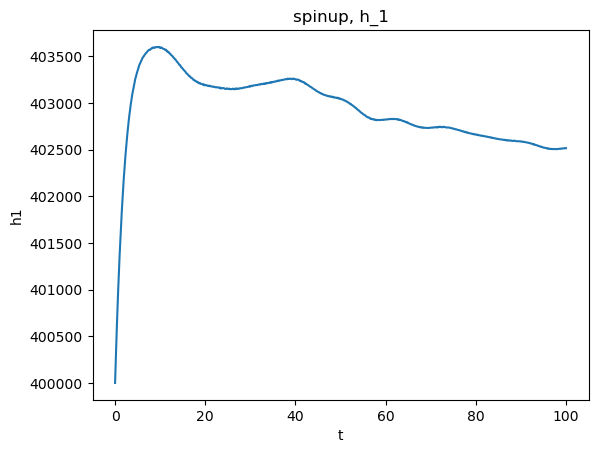

In [37]:
(sol_2l_vmt.h1/meter).sel(longitude=0.,latitude=0.,method='nearest').plot()
plt.title('spinup, h_1')

/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


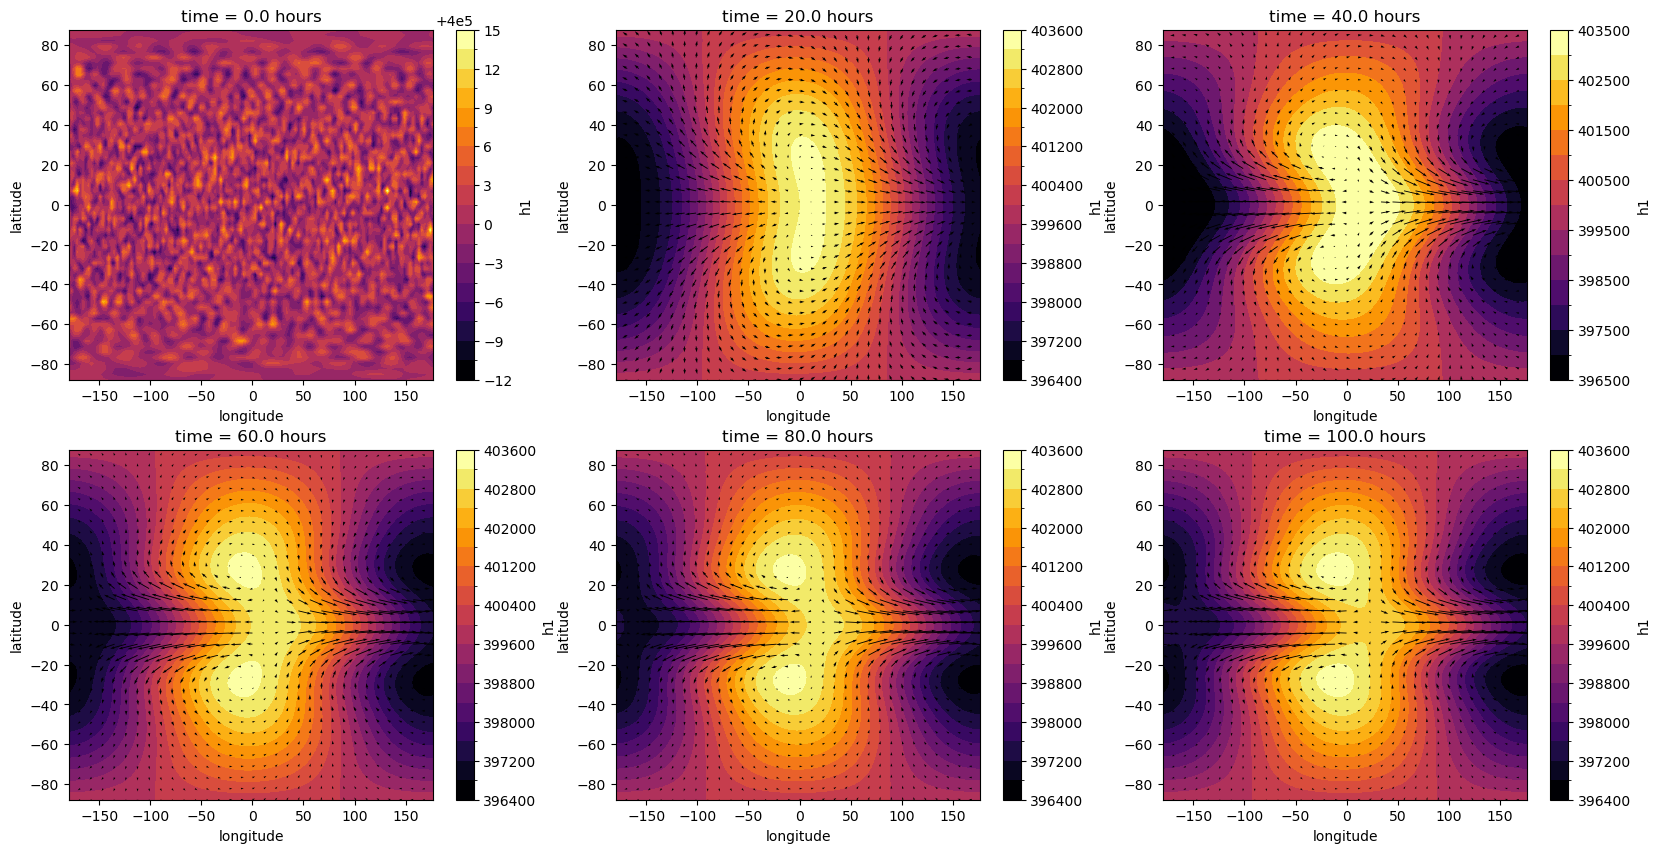

In [12]:
sol=sol_2l_vmt
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.h1[time])/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno)
    n=4;m=2
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  sol.u1[time][::n,::m].T,
                  sol.v1[time][::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

Text(0.5, 1.0, 'Zonal-mean u,top layer')

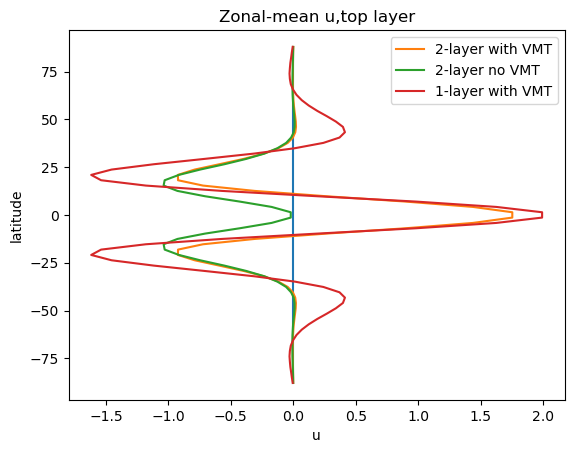

In [38]:
(sol_2l_vmt.u1.mean('longitude')[0]  /(meter/second)).plot(y='latitude')
(sol_2l_vmt.u1.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='2-layer with VMT')
(sol_2l_novmt.u1.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='2-layer no VMT')
(sol_1l.u.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='1-layer with VMT')
plt.legend()
plt.title('Zonal-mean u,top layer')

Text(0.5, 1.0, 'Zonal-mean u, top and bottom layers')

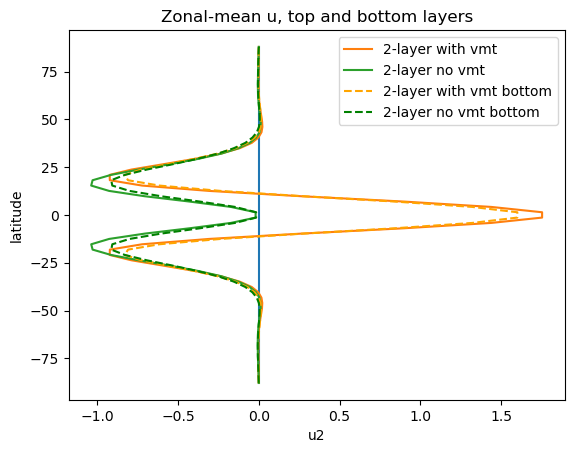

In [39]:
(sol_2l_vmt.u1.mean('longitude')[0]  /(meter/second)).plot(y='latitude')
(sol_2l_vmt.u1.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='2-layer with vmt')
(sol_2l_novmt.u1.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='2-layer no vmt')
(sol_2l_vmt.u2.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='2-layer with vmt bottom',color='orange',linestyle='--')
(sol_2l_novmt.u2.mean('longitude')[-1] /(meter/second)).plot(y='latitude',label='2-layer no vmt bottom',color='g',linestyle='--')

plt.legend()
plt.title('Zonal-mean u, top and bottom layers')

Text(0.5, 1.0, 'u(longitude) at the equator')

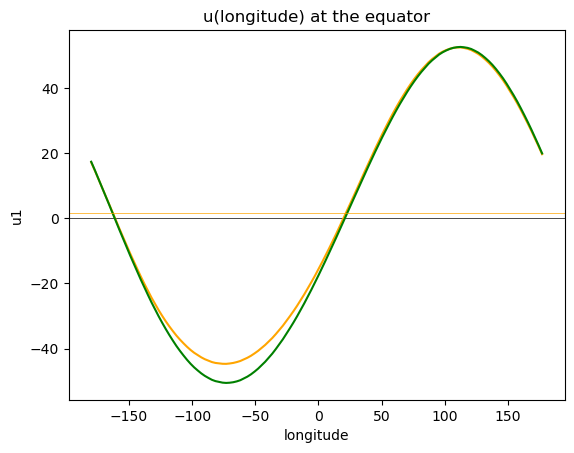

In [40]:
plt.axhline(0.,color='k',linewidth=0.5)
(sol_2l_vmt.u1.sel(latitude=0,method='nearest')[-1] /(meter/second)).plot(color='orange')
(sol_2l_novmt.u1.sel(latitude=0,method='nearest')[-1] /(meter/second)).plot(color='green')

plt.axhline(sol_2l_vmt.u1.sel(latitude=0,method='nearest')[-1].mean() /(meter/second),color='orange',linewidth=0.5)

plt.title('u(longitude) at the equator')

# Axisymmetric forcing
$\Delta H_{eq} = 0.01 H_0$

In [20]:
sol_2l_axisymmetric_vmt = thetaphi_to_lonlat(xr.open_dataset('snapshots_2l_axisymmetric_vmt/snapshots_2l_axisymmetric_vmt_s1.h5',engine='dedalus'))
sol_2l_axisymmetric_novmt = thetaphi_to_lonlat(xr.open_dataset('snapshots_2l_axisymmetric_novmt/snapshots_2l_axisymmetric_novmt_s1.h5',engine='dedalus'))
sol_1l_axisymmetric_vmt = thetaphi_to_lonlat(xr.open_dataset('snapshots_1lay_axisymmetric_vmt_smallforcing/snapshots_1lay_axisymmetric_vmt_smallforcing_s1.h5',engine='dedalus'))



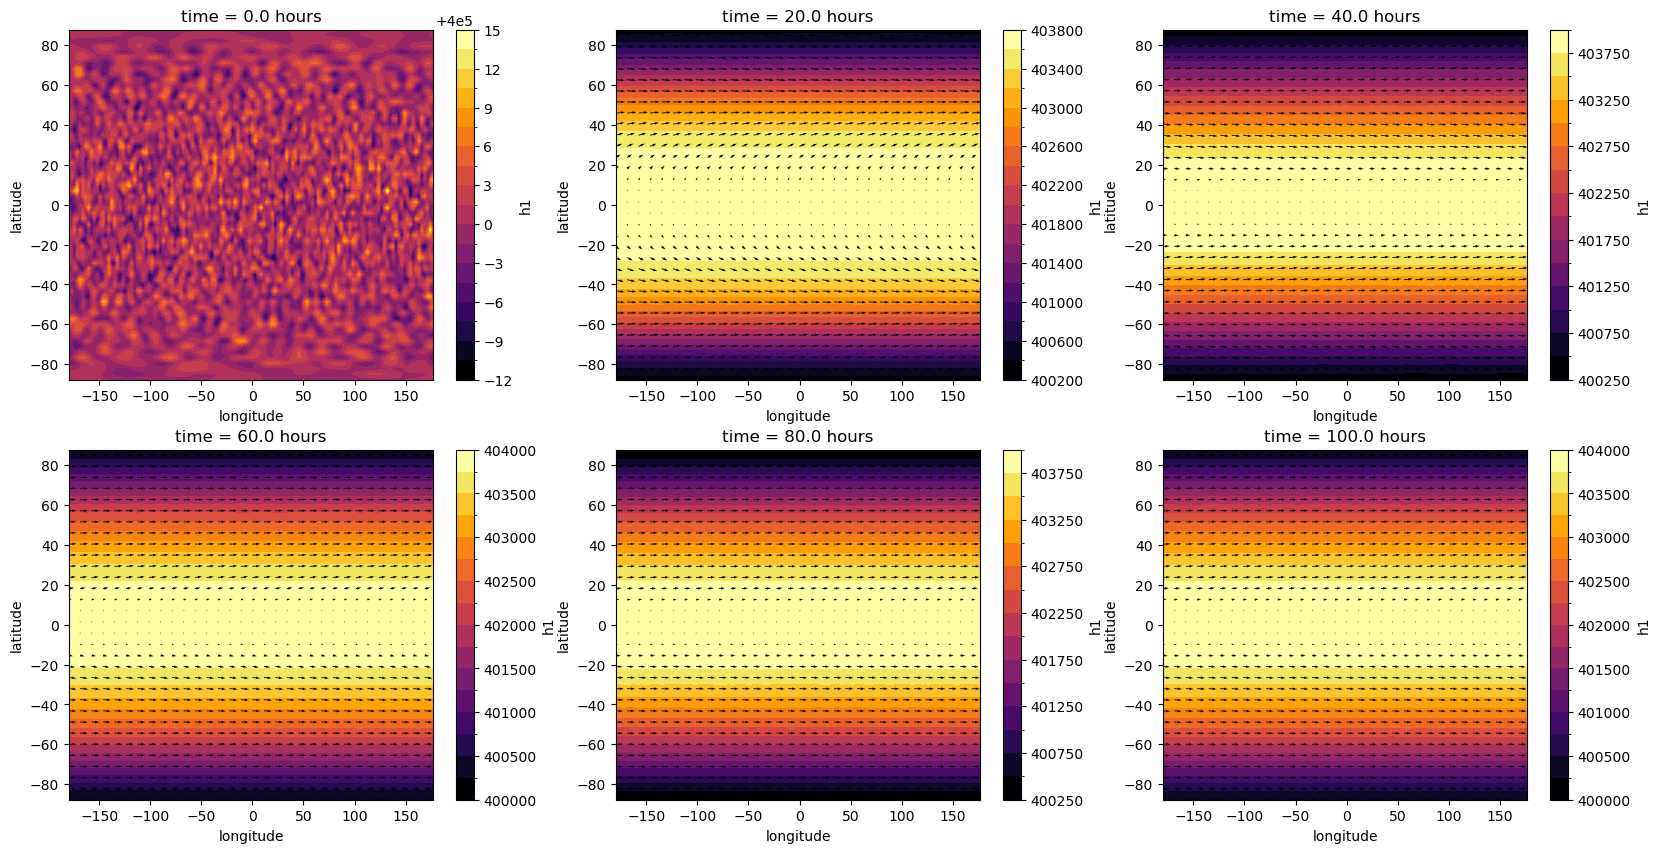

In [22]:
sol=sol_2l_axisymmetric_vmt
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.h1[time])/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno)
    n=4;m=2
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  sol.u1[time][::n,::m].T,
                  sol.v1[time][::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

Text(0.5, 1.0, 'Zonal mean u for axisymmetric runs')

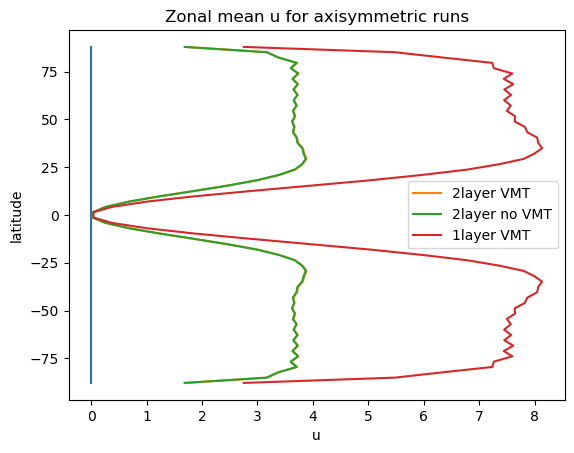

In [42]:
(sol_2l_axisymmetric_vmt.u1.mean('longitude')[0]  /(meter/second)).plot(y='latitude')
(sol_2l_axisymmetric_vmt.u1.mean('longitude')[-1]  /(meter/second)).plot(y='latitude',label="2layer VMT")
(sol_2l_axisymmetric_novmt.u1.mean('longitude')[-1]  /(meter/second)).plot(y='latitude',label="2layer no VMT")

(sol_1l_axisymmetric_vmt.u.mean('longitude')[-1]  /(meter/second)).plot(y='latitude',label="1layer VMT")
plt.legend()
plt.title("Zonal mean u for axisymmetric runs")

Text(0.5, 1.0, 'Spinup of global-mean u for axisymmetric runs')

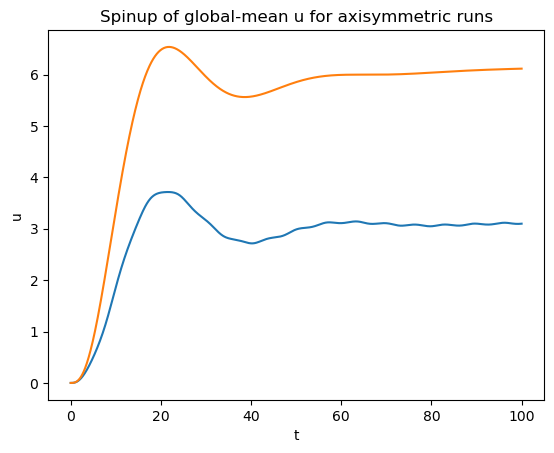

In [43]:
(sol_2l_axisymmetric_vmt.u1.mean(('latitude','longitude'))  /(meter/second)).plot()
(sol_1l_axisymmetric_vmt.u.mean(('latitude','longitude'))  /(meter/second)).plot()
plt.title("Spinup of global-mean u for axisymmetric runs")